In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
hist_coal_gen = pd.read_csv("hist_coal_generation.csv")
all_last_rows_coal = pd.read_csv("hist_coal_generation_lastrows.csv")
all_last_rows_coal["label"] = all_last_rows_coal["label"].fillna("None")
hist_coal_gen = pd.merge(hist_coal_gen,all_last_rows_coal[["Country Code","label"]],on="Country Code")
hist_coal_gen

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Gen_Nuclear_new_TWh,Gen_Nuclear_vPeakCoal,Gen_Gas_new_TWh,Gen_Gas_vPeakCoal,Gen_Growth,Gen_Coal_PhaseOut,RE_vPeakCoal,year_since_peak_gen,rate_decline_test,label
0,DEU,1990,45410.5,250.1,1927.0,45410.5,0.0,0.0,0.0,63.0,...,0.00,0.000000,0.00,0.000000,1.000000,0.000000,0.000000,0,NaN,Mixed
1,DEU,1991,45832.5,252.5,1927.0,45832.5,0.0,0.0,0.0,64.0,...,-5.24,-0.016901,-4.35,-0.014030,0.964553,-0.007644,0.000484,1,0.007644,Mixed
2,DEU,1992,46559.5,256.3,1927.0,46559.5,0.0,0.0,0.0,65.0,...,6.33,0.020417,-7.57,-0.024416,0.957554,-0.046349,0.000710,2,0.023174,Mixed
3,DEU,1993,47339.5,260.4,1927.0,47339.5,0.0,0.0,0.0,66.0,...,0.81,0.002613,-5.89,-0.018998,0.921526,-0.054154,0.001935,3,0.018051,Mixed
4,DEU,1994,47929.9,263.2,1927.0,47929.9,0.0,0.0,0.0,67.0,...,-1.77,-0.005709,-0.21,-0.000677,0.930299,-0.063701,0.004419,4,0.015925,Mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,MEX,2018,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,36.0,...,4.91,0.152484,51.93,1.612733,2.468012,-0.115839,0.315217,6,0.019306,Mixed
987,MEX,2019,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,37.0,...,2.47,0.076708,43.49,1.350621,2.035093,-0.094720,0.621429,7,0.013531,Mixed
988,MEX,2020,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,38.0,...,2.46,0.076398,50.80,1.577640,2.266149,-0.426708,0.846894,8,0.053339,Mixed
989,MEX,2021,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,39.0,...,3.02,0.093789,54.89,1.704658,2.621118,-0.587267,0.974845,9,0.065252,Mixed


In [100]:
countries_list = hist_coal_gen["Country Code"].unique()
for cntry in countries_list:
    cntry_data = hist_coal_gen[hist_coal_gen["Country Code"]==cntry]
    cntry_data = cntry_data.reset_index().set_index("Year")
    for yr in cntry_data.index[2:-2]:
        this_year_index = cntry_data.loc[yr,"index"]
        yr_cntry_data = (cntry_data.loc[yr+2,"Share_Coal_Gen"] - cntry_data.loc[yr-2,"Share_Coal_Gen"])/4
        hist_coal_gen.loc[this_year_index,"moving_avg_coal_in_total"] = yr_cntry_data
        hist_coal_gen.loc[this_year_index,"moving_avg_coal_gen"] = (cntry_data.loc[yr+2,"Gen_Coal_vPeak"] - cntry_data.loc[yr-2,"Gen_Coal_vPeak"])/4
        hist_coal_gen.loc[this_year_index,"mean_share"] = cntry_data.loc[yr-2:yr+2]["Gen_Coal_vPeak"].mean()
        if yr >= cntry_data.index[3]:
            hist_coal_gen.loc[this_year_index,"mean_share_red"] = cntry_data.loc[yr-2:yr+2]["Gen_Coal_vPeak"].mean() - cntry_data.loc[yr-3:yr+1]["Gen_Coal_vPeak"].mean()
hist_coal_gen

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,year_since_peak_gen,rate_decline_test,label,moving-avg-coal-in-total,moving_avg_coal_in_total,moving_avg_coal_gen,mean-share,mean-share-red,mean_share,mean_share_red
0,DEU,1990,45410.5,250.1,1927.0,45410.5,0.0,0.0,0.0,63.0,...,0,NaN,Mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEU,1991,45832.5,252.5,1927.0,45832.5,0.0,0.0,0.0,64.0,...,1,0.007644,Mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DEU,1992,46559.5,256.3,1927.0,46559.5,0.0,0.0,0.0,65.0,...,2,0.023174,Mixed,0.003569,-0.003569,-0.015925,0.965630,NaN,0.965630,NaN
3,DEU,1993,47339.5,260.4,1927.0,47339.5,0.0,0.0,0.0,66.0,...,3,0.018051,Mixed,0.007881,-0.007881,-0.014942,0.952148,-0.013482,0.952148,-0.013482
4,DEU,1994,47929.9,263.2,1927.0,47929.9,0.0,0.0,0.0,67.0,...,4,0.015925,Mixed,0.004138,-0.004138,0.000258,0.944614,-0.007535,0.944614,-0.007535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,MEX,2018,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,36.0,...,6,0.019306,Mixed,0.012042,-0.012042,-0.103416,0.847205,-0.080870,0.847205,-0.080870
987,MEX,2019,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,37.0,...,7,0.013531,Mixed,0.013220,-0.013220,-0.118401,0.732360,-0.114845,0.732360,-0.114845
988,MEX,2020,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,38.0,...,8,0.053339,Mixed,0.006487,-0.006487,-0.058773,0.684907,-0.047453,0.684907,-0.047453
989,MEX,2021,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,39.0,...,9,0.065252,Mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Year', ylabel='mean_share_red'>

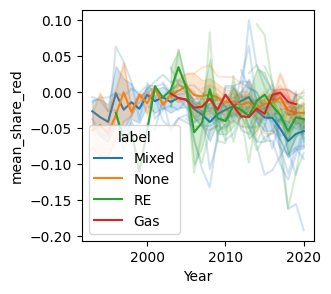

In [101]:
fig, axes = plt.subplots(figsize=(3,3))
sns.lineplot(x="Year",y='mean_share_red',data=hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0],
             hue="label",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="Year",y='mean_share_red',data=hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=0],
             hue="label",zorder=1)

<Axes: xlabel='label', ylabel='moving_avg_coal_in_total'>

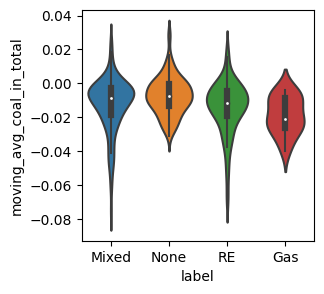

In [104]:
fig, axes = plt.subplots(figsize=(3,3))
sns.violinplot(data=hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=2],
                   x="label", y="moving_avg_coal_in_total",
                   linewidth=1.5)

<Axes: xlabel='Year', ylabel='moving_avg_coal_gen'>

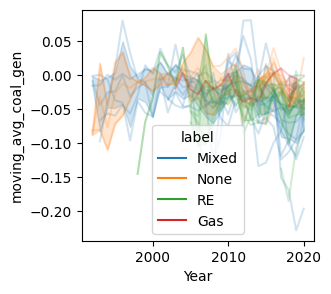

In [86]:
fig, axes = plt.subplots(figsize=(3,3))
sns.lineplot(x="Year",y='moving_avg_coal_gen',data=hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=2],
             hue="label",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="Year",y='moving_avg_coal_gen',data=hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=2],
             hue="label",alpha=0.2,zorder=1)

<Axes: xlabel='label', ylabel='moving_avg_coal_gen'>

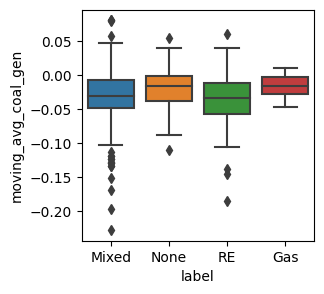

In [105]:
fig, axes = plt.subplots(figsize=(3,3))
sns.boxplot(data=hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=2],
                   x="label", y="moving_avg_coal_gen")

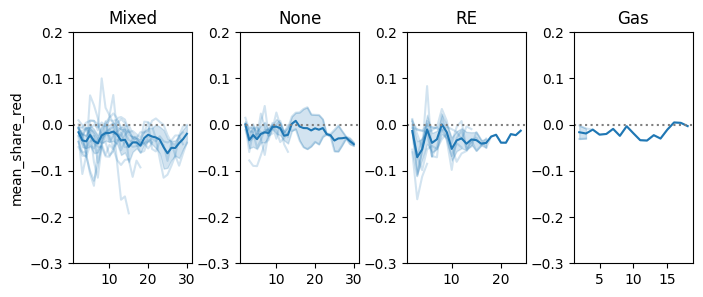

In [102]:
fig, axes = plt.subplots(1,4,figsize=(8,3))
fig.subplots_adjust(wspace=0.4)
varname = 'mean_share_red'
count = 0
for label_name in hist_coal_gen["label"].unique():
    this_ax = axes[count]
    plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=2]
    plot_data = plot_data.query("label==@label_name")
    sns.lineplot(x="year_since_peak_gen",y=varname,data=plot_data,
                 hue="label",units="Country Code",estimator=None,alpha=0.2,zorder=1,ax=this_ax,legend=None)
    sns.lineplot(x="year_since_peak_gen",y=varname,data=plot_data,
                 hue="label",ax=this_ax,zorder=1,legend=None)
    this_ax.axhline(y=0,color="gray",linestyle=":")
    this_ax.set_ylim([-0.3,0.2])
    this_ax.set_title(label_name)
    this_ax.set_xlabel(None)
    if count != 0:
        this_ax.set_ylabel(None)
    count = count + 1

(-0.3, 0.2)

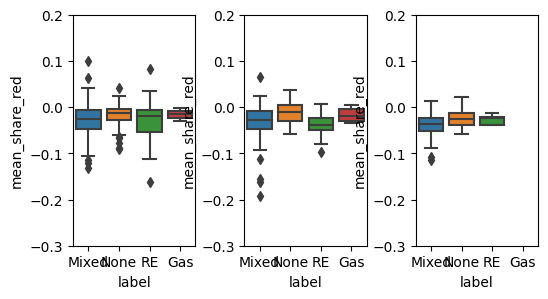

In [103]:
fig, axes = plt.subplots(1,3,figsize=(6,3))
fig.subplots_adjust(wspace=0.4)

plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_gen"]>=2]
#sns.boxplot(data=plot_data[plot_data["Year"]<2000],x="label", y="moving_avg_coal_gen",ax=axes[0])
#sns.boxplot(data=plot_data[plot_data["Year"].isin(np.arange(10)+2000)],x="label", y="moving_avg_coal_gen",ax=axes[1])
#sns.boxplot(data=plot_data[plot_data["Year"].isin(np.arange(10)+2010)],x="label", y="moving_avg_coal_gen",ax=axes[2])
sns.boxplot(data=plot_data[plot_data["year_since_peak_gen"]<10],x="label", y="mean_share_red",ax=axes[0])
sns.boxplot(data=plot_data[plot_data["year_since_peak_gen"].isin(np.arange(10)+10)],x="label", y="mean_share_red",ax=axes[1])
sns.boxplot(data=plot_data[plot_data["year_since_peak_gen"].isin(np.arange(10)+20)],x="label", y="mean_share_red",ax=axes[2])
axes[0].set_ylim([-0.3,0.2])
axes[1].set_ylim([-0.3,0.2])
axes[2].set_ylim([-0.3,0.2])